# Deliverable -1 (Exploratory data quality report)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
concrete_df = pd.read_csv("concrete.csv")

In [4]:
# Check top few records to get a feel of the data structure
concrete_df.head(20)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
#Lets analysze the distribution of the concrete data
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable "Strength"
Missing Values: None. 

All independent variables seem to have outliers as the max values are too high as compared to the 50th percentile/
We will have to check these by plotting box plots for each variable. Treatment of outliers may have to be considered as well.

In [6]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
concrete_df.shape

(1030, 9)

1)Cement is a water-based binder used to bind other building materials together. It is used in the production of mortar and concrete during the construction process. When cement is mixed with water and sand, the outcome is cement plaster, yet when cement is mixed with water, lime and sand, the result is mortar.

2)Slag Cement Benefits and Use in Concrete. Slag cement is a hydraulic cement formed when granulated blast furnace slag (GGBFS) is ground to suitable fineness and is used to replace a portion of portland cement. It is a recovered industrial by-product of an iron blast furnace.

3)Fly ash is a pozzolan, a substance containing aluminous and siliceous material that forms cement in the presence of water. ... When used in concrete mixes, fly ash improves the strength and segregation of the concrete and makes it easier to pump.

4)Superplasticizers (SP's), also known as high range water reducers, are additives used in making high strength concrete. ... Superplasticizers allow reduction in water content by 30% or more. These additives are employed at the level of a few weight percent. Plasticizers and superplasticizers retard the curing of concrete.

5)Generally coarse aggregate is blended with finer aggregates (such as sand) to fill in the spaces left between the large pieces and to “lock” the larger pieces together. This reduces the amount of cement paste required and decreases the amount of shrinkage that could occur.

6)Fine aggregates ensure the concrete has a uniform strength.

7)The strength of concrete increases with the age and 99% of concrete strength is gained by 28 days. Age of concrete is the time elapsed since it was poured in place and left to set. However, another important concept is the Maturity of Concrete. Maturity is a relationship between the age, temperature and hence strength gained by concrete. Since we do not have temparture data we will not look at the Maturity in this analysis.

8) Water is the key ingredient, which when mixed with cement, forms a paste that binds the aggregate together. The water causes the hardening of concrete through a process called hydration. ... The role of water is important because the water to cement ratio is the most critical factor in the production of "perfect" concrete.

All the independent variables have a non normal distribution. Cement and Strength seem to have some linear releation however like most of the other independent variable there is minimal to no linear relationship between dependant variable "Strength" and all independant variable. Also on visual analysis the independent variables also show very less to no linear relationship.

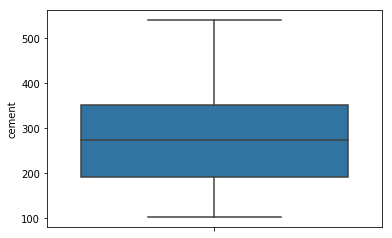

In [11]:
sns.boxplot(concrete_df['cement'], fliersize=2, orient='v')

In [9]:
Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


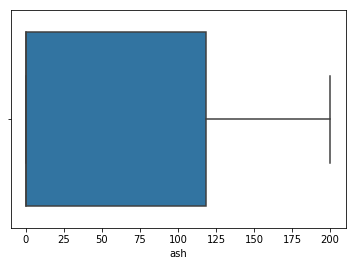

In [13]:
sns.boxplot(concrete_df['ash'], fliersize=2, orient='h')

In [14]:
Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


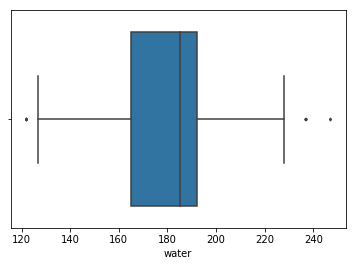

In [24]:
sns.boxplot(concrete_df['water'], fliersize=2)

In [15]:
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


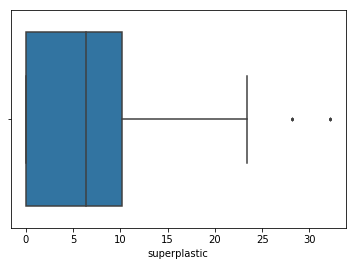

In [25]:
sns.boxplot(concrete_df['superplastic'], fliersize=2)

In [16]:
Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


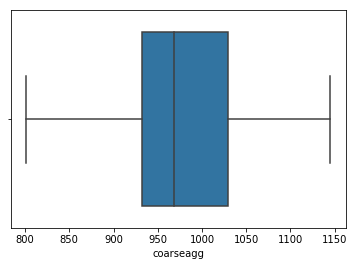

In [26]:
sns.boxplot(concrete_df['coarseagg'], fliersize=2)

In [17]:
Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


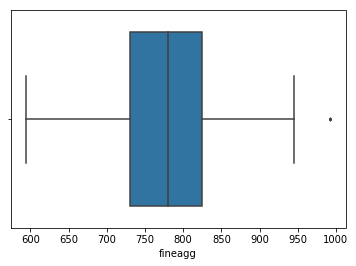

In [27]:
sns.boxplot(concrete_df['fineagg'], fliersize=2)

In [18]:
Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


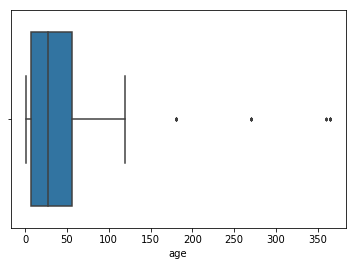

In [28]:
sns.boxplot(concrete_df['age'], fliersize=2)

In [19]:
Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


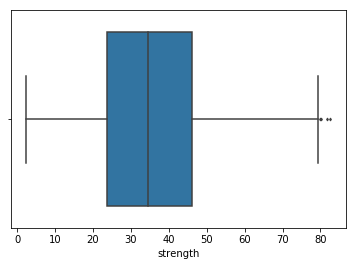

In [29]:
sns.boxplot(concrete_df['strength'], fliersize=2)

In [20]:
Q1=concrete_df['strength'].quantile(q=0.25)
Q3=concrete_df['strength'].quantile(q=0.75)
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in strength: ', L_outliers)
print('Upper outliers in strength: ', U_outliers)

Lower outliers in strength:  -9.927500000000013
Upper outliers in strength:  79.77250000000001


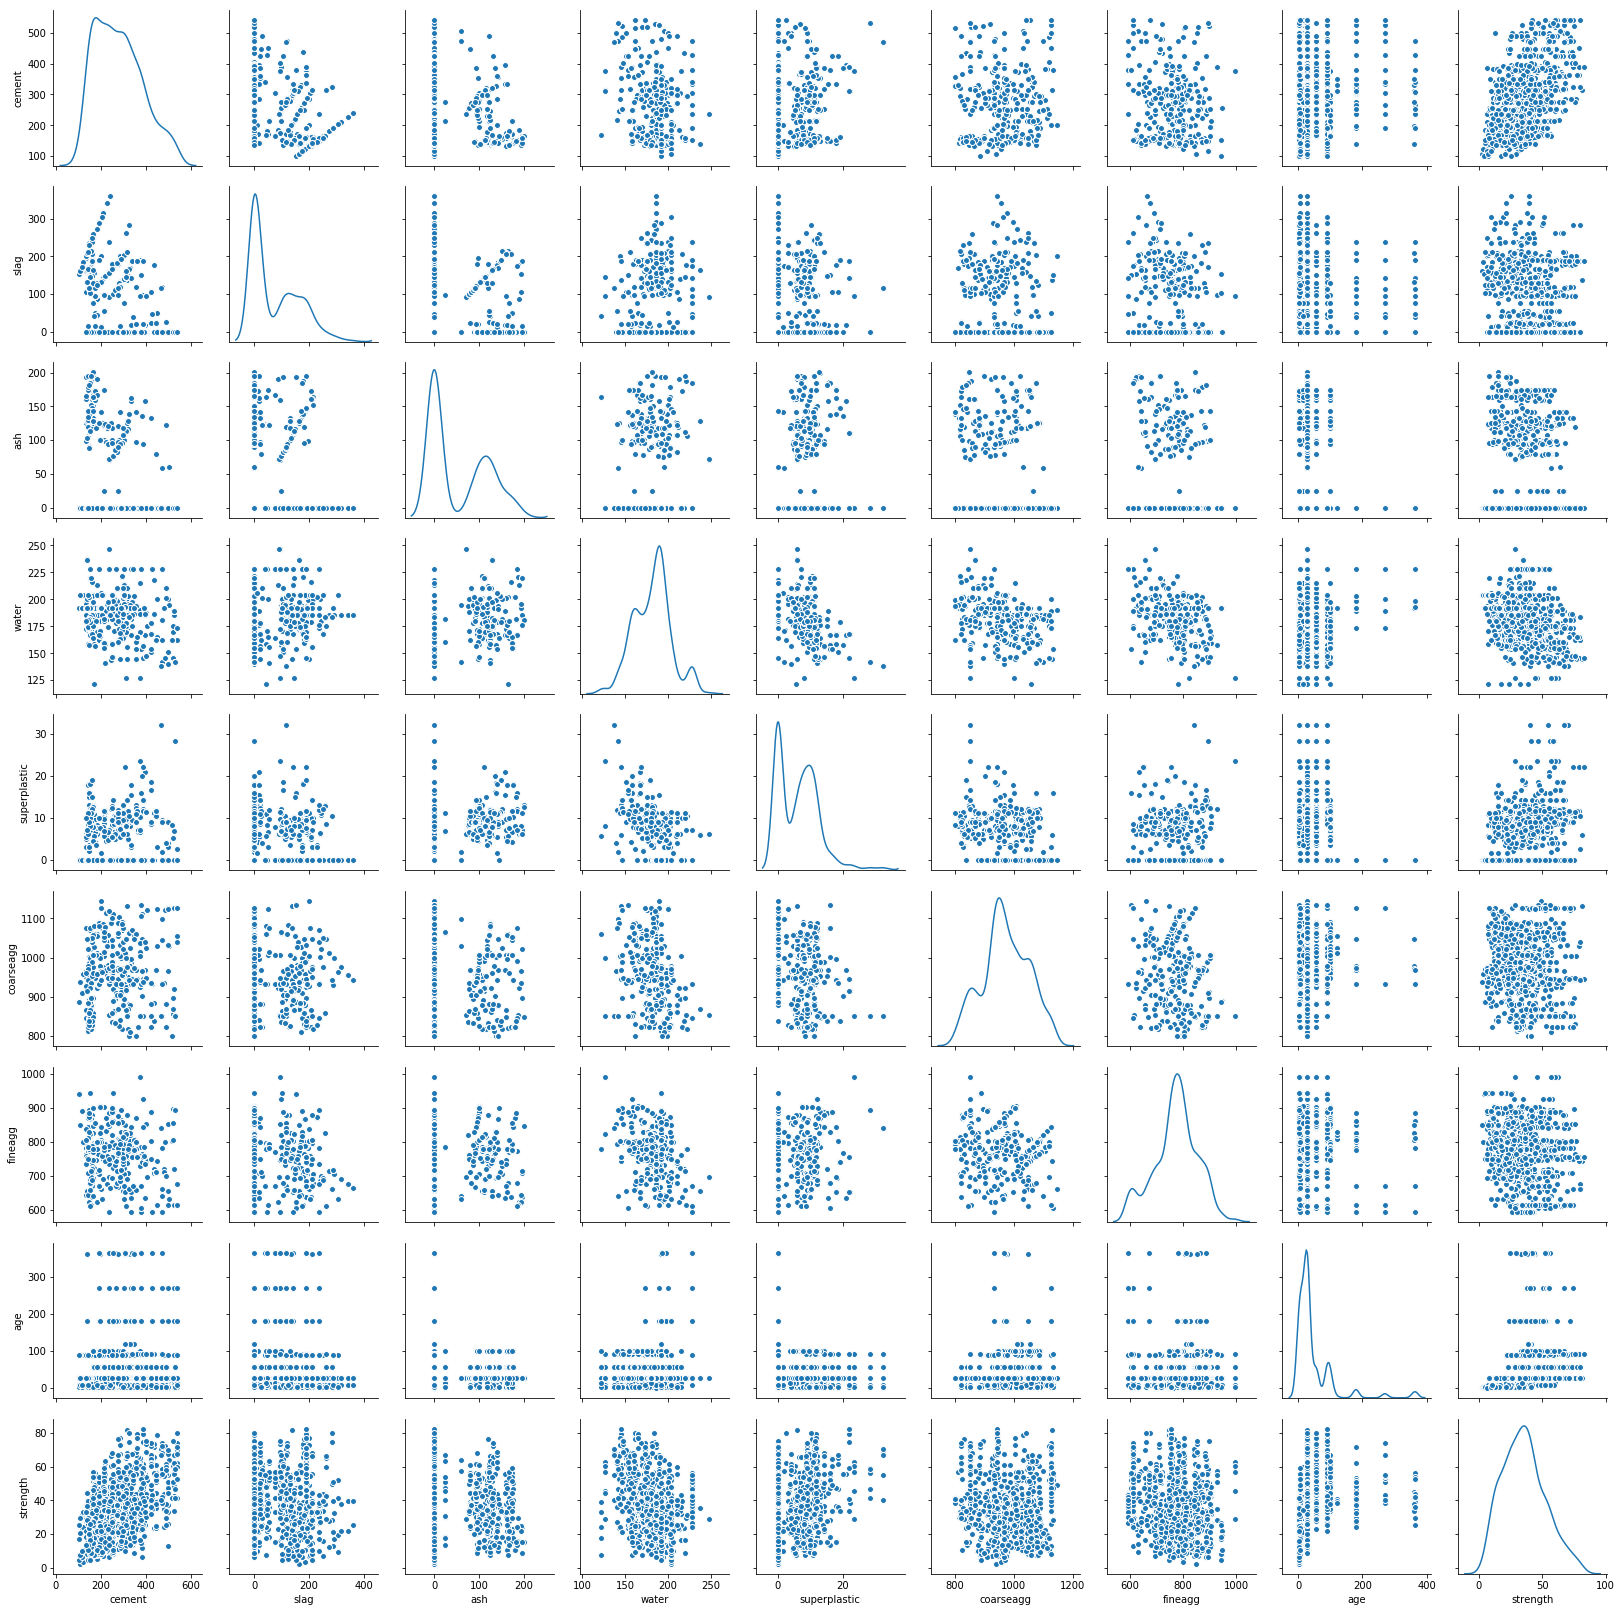

In [7]:
sns.pairplot(concrete_df, diag_kind='kde')

Daigonal Analysis
cement attribute have almost normal curve.
slag has two gausssians and rightly skewed.It shows the presence of outliers.
ash has two gaussians and rightly skewed.It shows the presence of outliers.
water has atleast guassians and slighly left skewed.It shows the presence of outliers.
superplastic has multiple gaussians and rightly skewed.It shows the presence of outliers.
coarseagg has three guassians and almost normal.
fineagg has almost two guassians and looks like normal.
age has multiple guassians and rightly skewed. It shows the presence of outlies.
strength is close to a normal curve.
We not only have missing values problem but also outliers problem in the dataset.

cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age.

slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. 

ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. 

water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. It reflects our research that superplasticizers reduce the requirement of water in the composition of concrete.

superplastic vs other independent attributes:This attribute have negative linear relationship with water only.

coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. I

fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


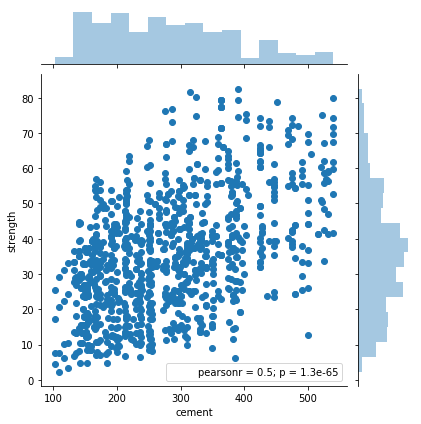

In [13]:
sns.jointplot(concrete_df['cement'], concrete_df['strength'], kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


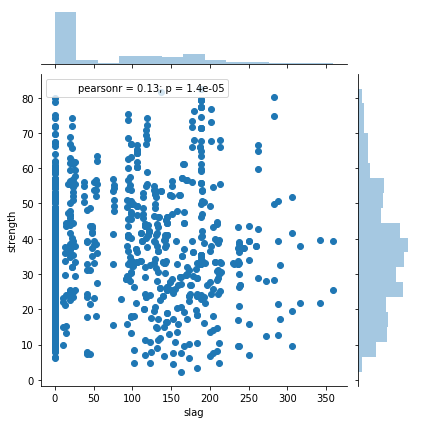

In [7]:
sns.jointplot(concrete_df['slag'], concrete_df['strength'], kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


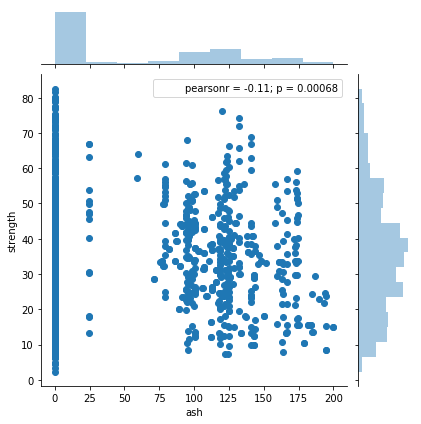

In [15]:
sns.jointplot(concrete_df['ash'], concrete_df['strength'], kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


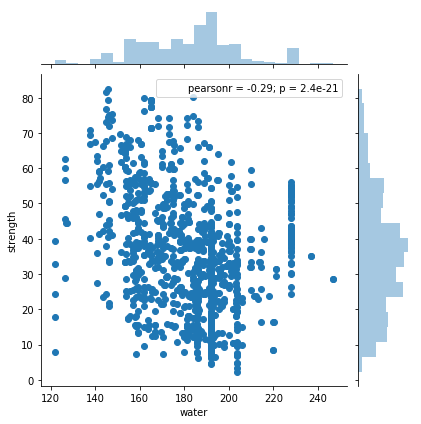

In [16]:
sns.jointplot(concrete_df['water'], concrete_df['strength'], kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


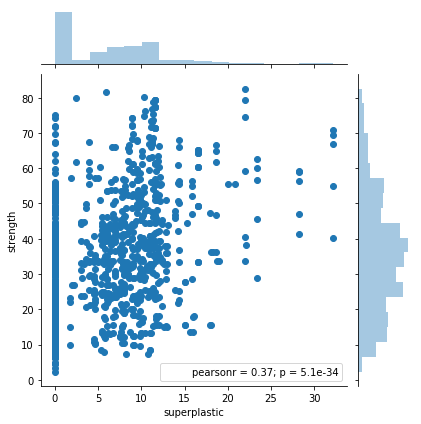

In [17]:
sns.jointplot(concrete_df['superplastic'], concrete_df['strength'], kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


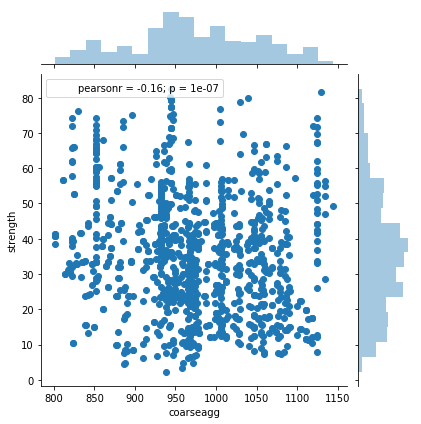

In [18]:
sns.jointplot(concrete_df['coarseagg'], concrete_df['strength'], kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


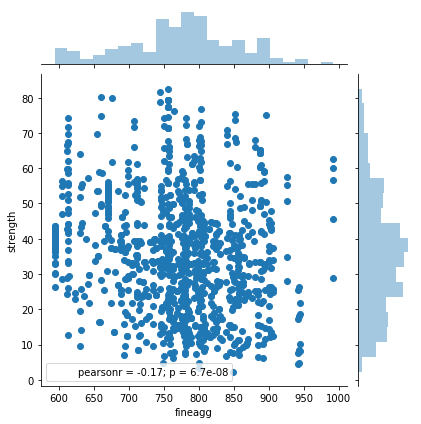

In [19]:
sns.jointplot(concrete_df['fineagg'], concrete_df['strength'], kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


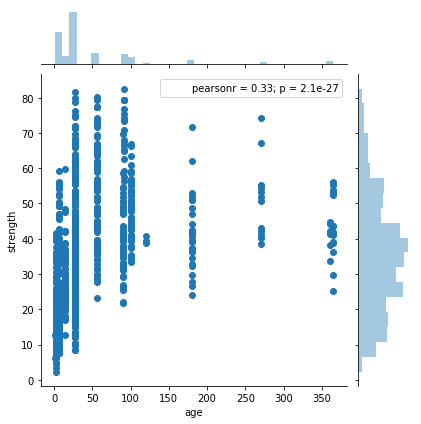

In [20]:
sns.jointplot(concrete_df['age'], concrete_df['strength'], kind='scatter')

The non colinearity between independent variables and the dependent variables is evident from the above joint plots.

strength attribute : Relationship between dependent and independent attributes

strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor. strength vs slag: There is no particular trend. strength vs slag: There is also no particular trend. strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor. strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor. Other attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them. This fact which stated in the case study which is evident from the data now.

In [21]:
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


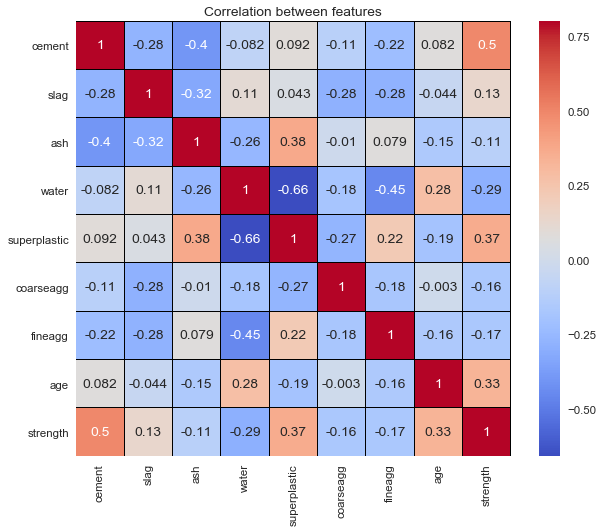

In [25]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10, 8))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="coolwarm",linecolor="black")
plt.title('Correlation between features');

It is also giving the same information we observed in pairplot analysis.
water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

# Missing Values and Outliers

In [26]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no missing values

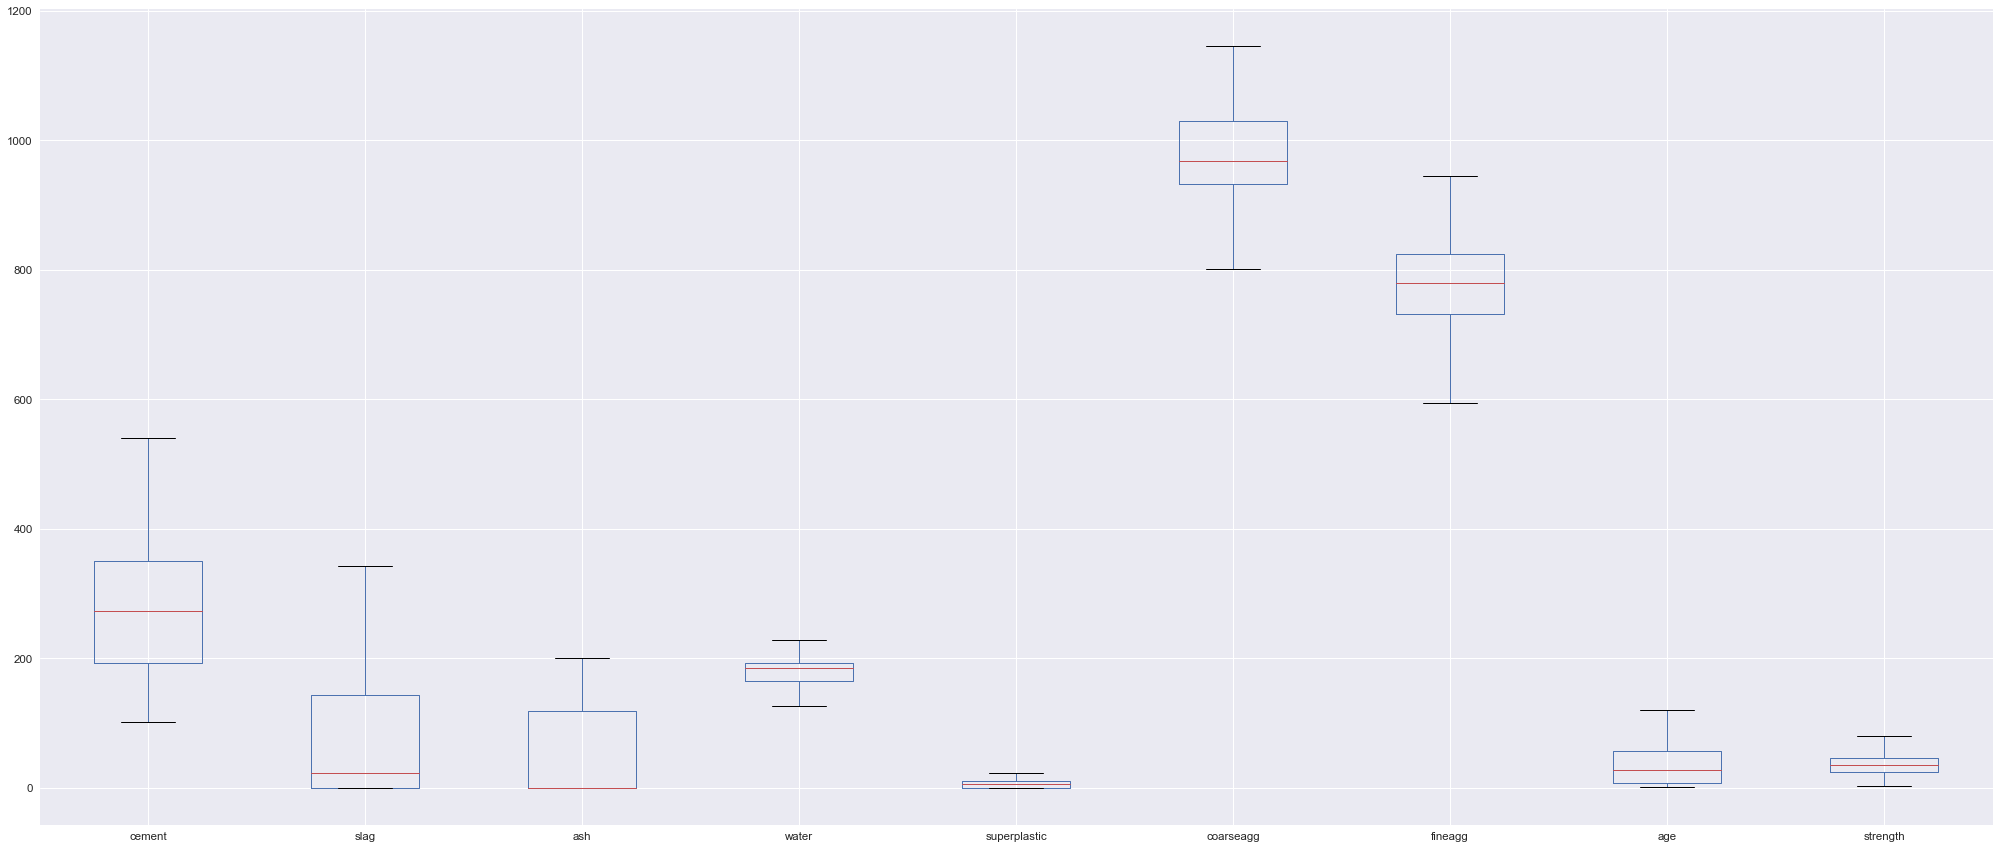

In [28]:
concrete_df1=concrete_df.copy()
concrete_df1.boxplot(figsize=(35,15))

Using the standard deviation method to detec the outliers. The outliers are not clearly visible on the box plots above. For each attritbutethe outliers are any values which are more than 3 times the std. dev. for  that attribute.  

In [29]:
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


Slag, Water, Superplastic and Age have outliers. The records number are given below

In [30]:
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [31]:
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])

Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [32]:
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [33]:
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])

Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


# Handling the outliers

In [34]:
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

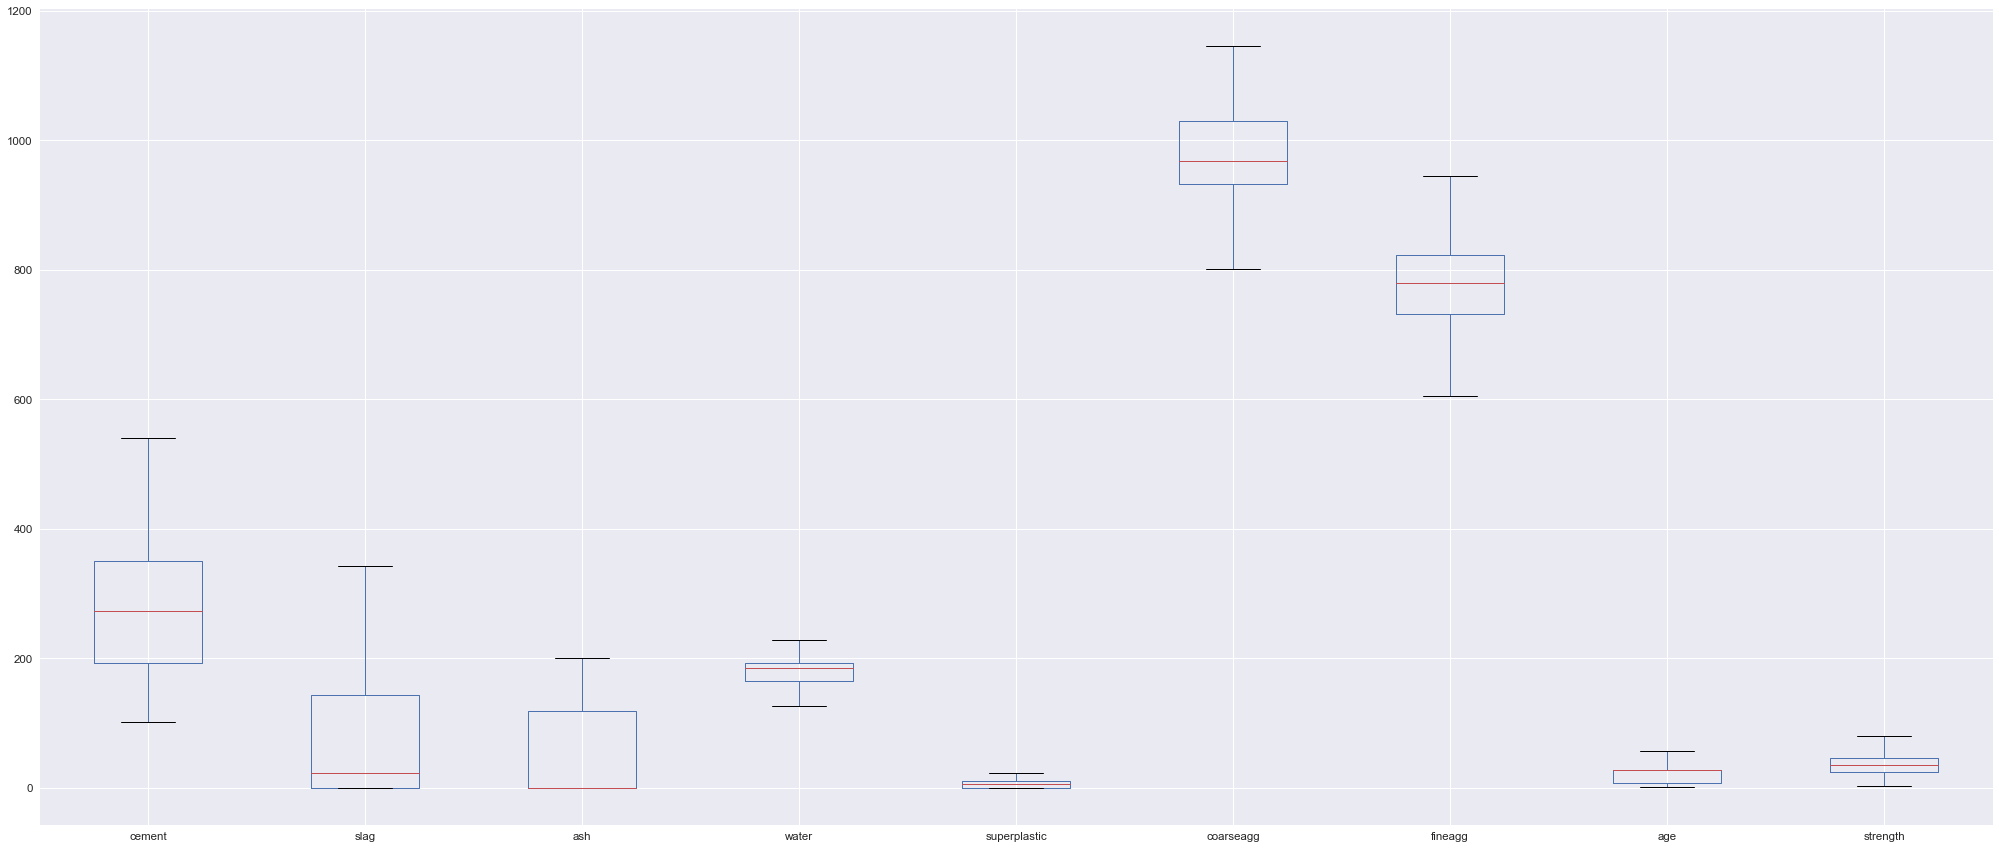

In [35]:
concrete_df1.boxplot(figsize=(35,15))

# Feature Engineering, Model Building and Model Tuning

Feature Scaling using the Z scores.

In [37]:
concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

Seperating the independent variables (X) and dependent variables (y).

In [39]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

Spliting data into Training and Testing set in 70:30 ratio

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

# Decision Tree Regression

In [46]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [47]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.349352
slag          0.093659
ash           0.011893
water         0.128319
superplastic  0.020612
coarseagg     0.033461
fineagg       0.033951
age           0.328753


Cement, water and age contibute to alomost 80% of the importance for determining the strength of concrete.

In [48]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.8473927644700944
Accuracy DT:  0.8473927644700944
MSE:  0.15930061808120954


99% performance on traiing data drops to 84% in test data. This indicates an overfitting in the model. Decision Trees have a tendency to overfit as well.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


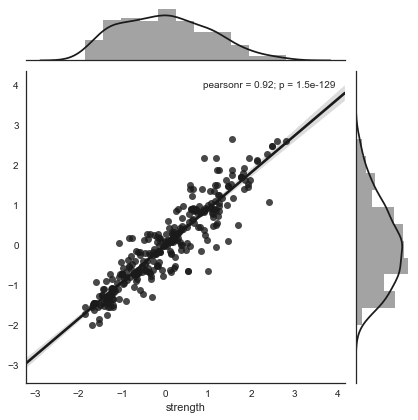

In [49]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [50]:
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393


# K fold cross validation

In [51]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8694797160766561
Standard Deviation:  0.03878374110151733


In [52]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480


# Another Round-2
For checking model performance after dropping less significant coulmns

In [53]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [54]:
concrete_df2=concrete_df_z.copy()

In [55]:
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)

In [56]:
y = concrete_df2['strength']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [58]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.371201
slag          0.111804
water         0.155343
superplastic  0.032516
age           0.329136


In [60]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8379467544061204
Accuracy DT:  0.8379467544061204


The model still shows overfitting and the Accuracy of this model is slightly decreased from the previous model. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


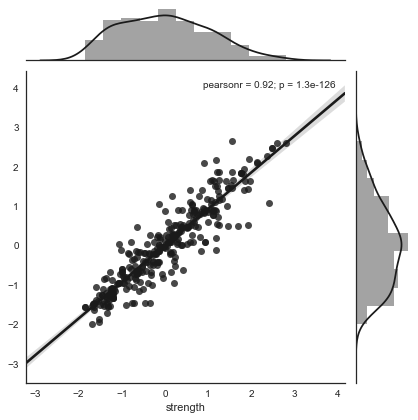

In [61]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [62]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947


# Regularising the Decision Tree

In [63]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

set max_depth = 4 and min_sample_leaf as 5

In [64]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [65]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


In the regularized DT model the variables coarseagg, fineagg, ash are of least importnance.

In [67]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [68]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828


By pruning the DT the model accuracy has significantly reduced.

# K Fold cross validation on pruned DT.

In [70]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6753537957355946
Standard Deviation:  0.08560979382660025


In [71]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354


Applying K Fold cross validation to the pruned DT slightly improve the model accuracy.

# Another Round -3

In [72]:
concrete_df3=concrete_df_z.copy()

In [73]:
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [74]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [75]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [76]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468


The accuracy of Pruned DT2 which uses dataframe created after dropping the less important variables like ash, coarseagg and fineagg is marginally higher than the Pruned DT which was modeled on entire dataframe.

# Using K Means Clustering

In [77]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774842e+07
2,3,2.141025e+07
3,4,1.867910e+07
4,5,1.661439e+07
5,6,1.524999e+07
6,7,1.368841e+07
7,8,1.226884e+07
8,9,1.133042e+07
9,10,1.043336e+07


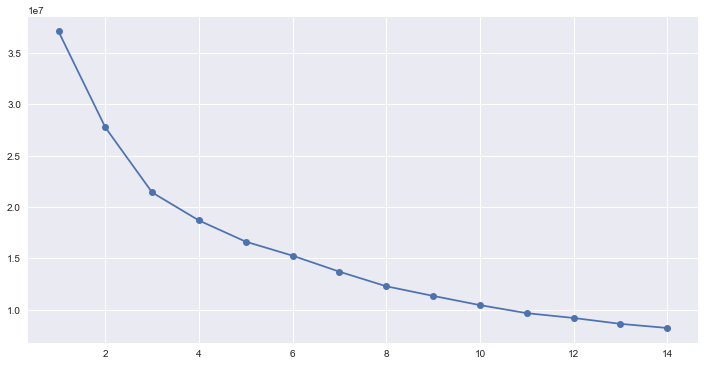

In [78]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Elbow Plot indicates the best  K value colud be 3. We will first try with value of 6 and then 3. 

In [79]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [80]:
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)
## The new column GROUP includes the cluster id for each record.

In [81]:
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [82]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272D9460860>,
      dtype=object)

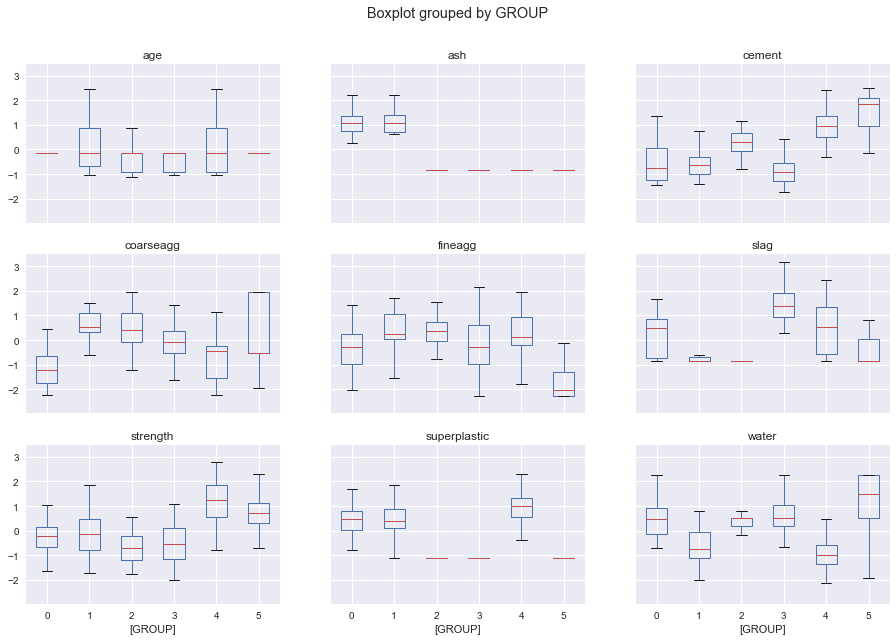

In [83]:
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

None of the variable seem to be good predictors of the traget variable. There is significant overlap in the clusters. We will check other models now.

# Random Forest

In [84]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [85]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9706437087808002
Performance on testing data using RFR: 0.880932183568308
Accuracy DT:  0.880932183568308
MSE:  0.12429015364367534


This model shows the same outcome as previous models. It is overfit on the training data and the accuracy decreases to great extent on test data.
##### However the Random Forest model has shown best results on test data if we see the table below.

In [87]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932


## Checking K Fold Crosss validation on the Randomforest Model.

In [88]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8996872082151434
Standard Deviation:  0.031305959678241915


In [89]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687


# Gradient Boosting Regressor

In [90]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [91]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8917896453323448
Accuracy DT:  0.8917896453323448
MSE:  0.1129564815291233


In [92]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790


# K fold cross validation on GB Regressor model

In [93]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.90002034091647
Standard Deviation:  0.026439051119394548


In [94]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


# ADA Boosting Regressor

In [95]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [102]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using ADABR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ADABR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ADABR: 0.9735571533035958
Performance on testing data using ADABR: 0.8746629261348783
Accuracy DT:  0.8746629261348784
MSE:  0.13083438190773994


In [97]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


Adaptive boosting does not have an impact of improving the accuracy of the model.

# K fold cross validation for ADA Boosting Regressor

In [98]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7728280505338732
Standard Deviation:  0.04047714963440991


In [99]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


# Bagging Regressor Model

In [100]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [103]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using Bagging R:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using Bagging R:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Bagging R: 0.9735571533035958
Performance on testing data using Bagging R: 0.8746629261348783
Accuracy DT:  0.8746629261348784
MSE:  0.13083438190773994


In [104]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


# K fold cross validation for Bagging Regressor

In [105]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8988565955066491
Standard Deviation:  0.031196936196141056


In [106]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


# KNN Regressor Model

In [107]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0,0.5,'Mean error')

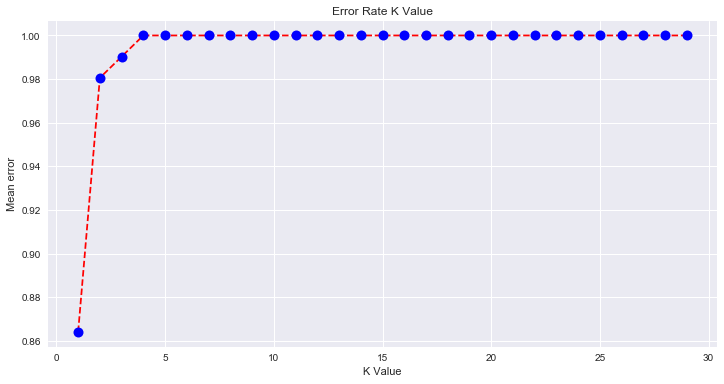

In [108]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

##### A K value of 3 seem to cover almost 98% of the data. Let us set the K value as 3

In [109]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [110]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [111]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


# K fold cross validation for improving the KNN Regressor.

In [112]:
num_folds = 30
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.791265681749521
Standard Deviation:  0.06617056736946313


In [113]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


# Support Vector Regressor

In [114]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [115]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [116]:
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


# K fold cross validation for SVR

In [117]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [121]:
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.847393
2,Decision Tree k fold,0.869480
3,Decision Tree2,0.837947
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.675354
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.880932
8,Random Forest Regressor k fold,0.899687
9,Gradient Boost Regressor,0.891790
10,Gradient Boost Regressor k fold,0.900020


#### We can conclude that Gradient Boost Regressor k fold,  Random Forest Regressor k fold, Gradient Boost Regressor, Bagging Regressor k fold, Bagging Regressor give better results as compared to other models.

# Bootstrap Sampling to top 2 models and assessing model performance range at 95% confidence level

### Using Gradient Boosting Regressor

In [123]:
concrete_XY = X.join(y)

In [125]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

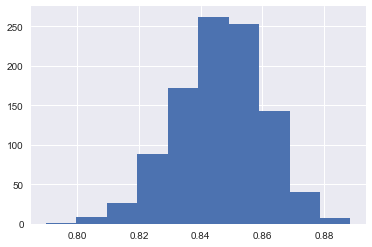

95.0 confidence interval 81.7% and 87.3%


In [126]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))



### Using Random Forest Regressor

In [127]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

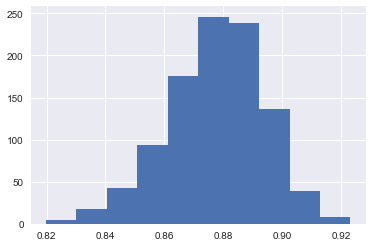

95.0 confidence interval 84.2% and 90.6%


In [128]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))